Build a regression model.

In [25]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import statsmodels as st

In [3]:
df = pd.read_csv('../data/gent_bike_stations_fsq.csv', index_col=False)

In [4]:
df.columns

Index(['station_id', 'station_name', 'latitude', 'longitude', 'empty_slots',
       'free_bikes', 'timestamp', 'station_uid', 'bars', 'museums',
       'restaurants', 'ratingbars', 'ratingmuseums', 'ratingrestaurants',
       'pricebars', 'pricerestaurants', 'popularitybars', 'popularitymuseums',
       'popularityrestaurants'],
      dtype='object')

In [6]:
df['bike_capacity'] = df['empty_slots'] + df['free_bikes']

In [7]:
#Filter the df for relevant data 
features = ['pricebars', 'pricerestaurants', 'popularitybars', 'popularityrestaurants', 'popularitymuseums', 'ratingbars', 'ratingrestaurants', 'ratingmuseums']
target = ['empty_slots', 'free_bikes', 'bike_capacity']

In [8]:
df_relevant = df[features + target].dropna()

In [9]:
df_relevant

,pricebars,pricerestaurants,popularitybars,popularityrestaurants,popularitymuseums,ratingbars,ratingrestaurants,ratingmuseums,empty_slots,free_bikes,bike_capacity
0,2.0,2.0,0.997026,0.997115,0.546150,8.392000,8.440000,7.3,2,1,3
1,2.0,1.0,0.698166,0.762818,0.000000,7.000000,6.900000,0.0,9,3,12
2,2.0,2.0,0.937231,0.996554,0.555822,7.605714,7.902041,6.8,2,4,6
3,2.0,2.0,0.763071,0.793465,0.716091,7.533333,7.639130,5.3,0,3,3
4,2.0,2.0,0.755928,0.847142,0.716091,7.685714,7.533333,5.3,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
401,2.0,2.0,0.974324,0.994424,0.870378,7.925532,7.865306,7.8,3,0,3
402,2.0,1.0,0.760246,0.868696,0.000000,7.333333,6.812500,0.0,1,1,2
403,1.0,1.5,0.867143,0.860524,0.000000,6.920000,7.400000,0.0,6,10,16
404,2.0,2.0,0.997727,0.997730,0.787714,8.510000,8.692000,7.7,2,1,3


Provide model output and an interpretation of the results. 

In [10]:
#Adding constant to the model
x_1 = sm.add_constant(df_relevant[features])
y_1 = df_relevant['empty_slots']

model = sm.OLS(y_1, x_1)
results = model.fit()


In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            empty_slots   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.647
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           0.000409
Time:                        01:17:14   Log-Likelihood:                -1083.3
No. Observations:                 406   AIC:                             2185.
Df Residuals:                     397   BIC:                             2221.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.99

## Output Interpreation 

The y variable - 'empty slots': the number of bikes that have been rented or are not available at the moment
the x variables - features part of the dataset including the aggregrate charactersitics from the different stations including average rating, popularity and price. 

Using a simple linear model, we can see that the average popularity of bars and museums in the area is a significant predictor of how many bikes would be rented. This is in line with my previous analysis of popularity as a possible important characteristic for understand bike-sharing as it takes into account foot traffic. 
Interestingly, the popularity of museums is negatively associated, which suggests that more popular museums have lesser chances of bikes NOT being at the station. 
Also, there is a very significant positive coefficient for popularity of bars for this response which suggests that around popular bars, there is lesser chances of having a free bike slot because it is most likely to be taken. 
 

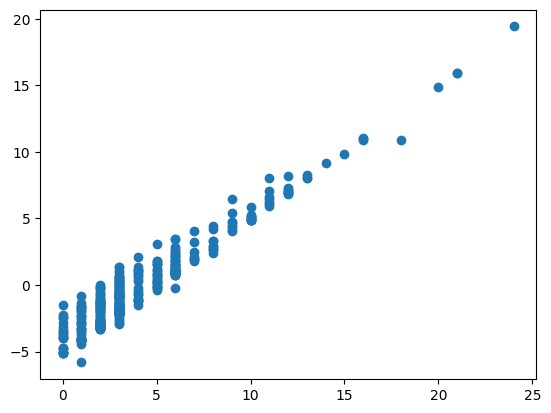

In [15]:
#Plot the residuals
plt.scatter(df_relevant['empty_slots'], results.resid)

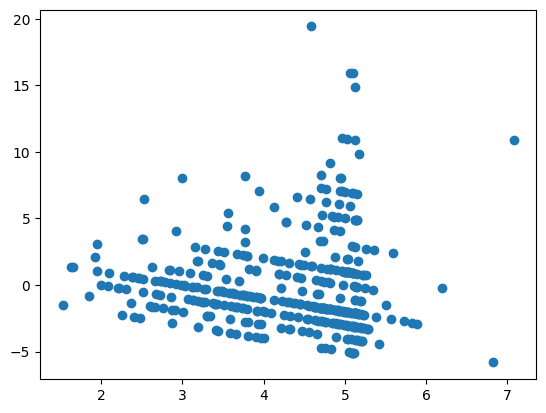

In [16]:
#Plot the relationship between the predicted values and the residuals
plt.scatter(results.fittedvalues, results.resid)

This plot looks problematic as it should be evenly scattered, however, it is fanning out a bit. This suggests there is something going on that is biasing the dataset. 

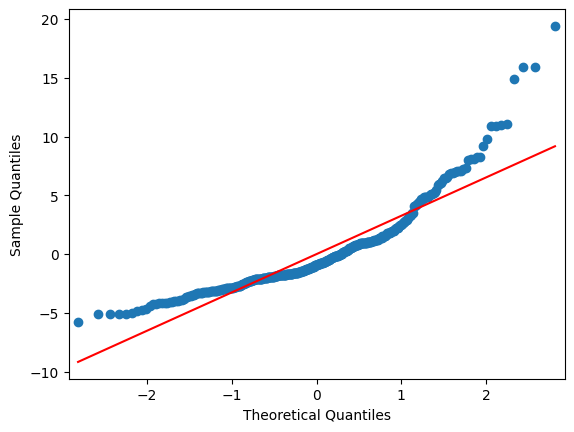

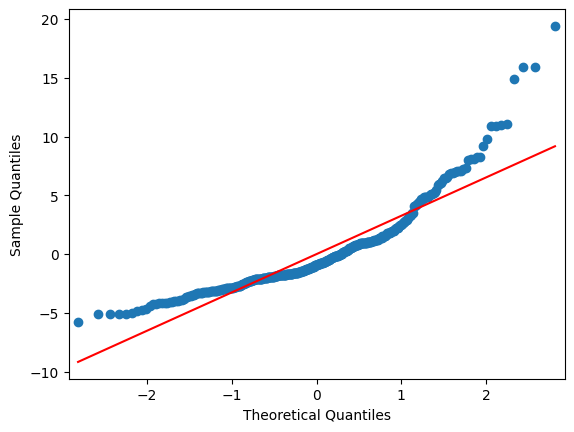

In [18]:
#plot the residuals qq plot
sm.qqplot(results.resid, line='r')

This shows that the data is approximately normal, however, there are outliers which are skewing the data which is expected for real-time, real-life data. 

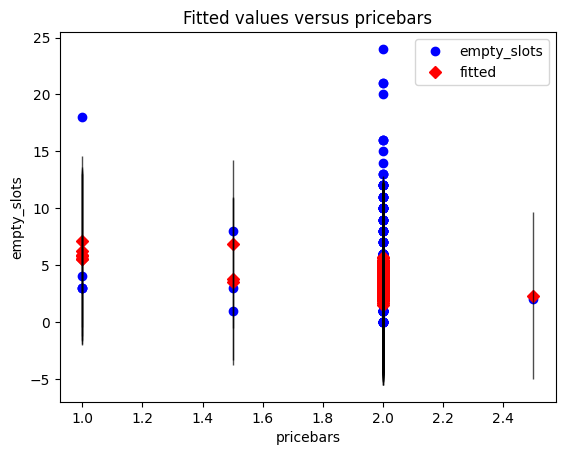

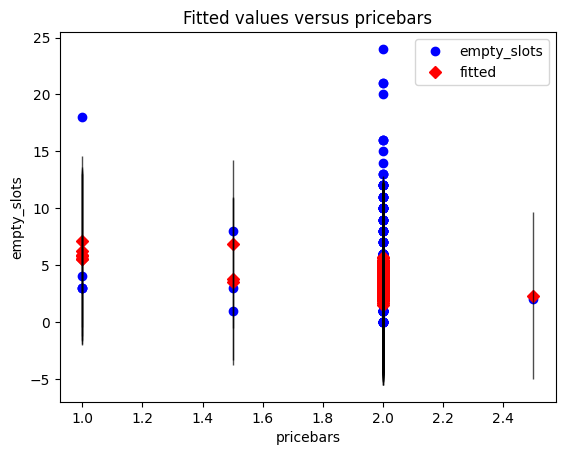

In [28]:
#Regression plot
st.graphics.regressionplots.plot_fit(results, 1)

In [12]:
#Extra 
#Adding constant to the model 2 for all bikes
x_1 = sm.add_constant(df_relevant[features])
y_2 = df_relevant['bike_capacity']

model1 = sm.OLS(y_2, x_1)
results1 = model1.fit()

In [14]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          bike_capacity   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     3.454
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           0.000731
Time:                        01:20:16   Log-Likelihood:                -1158.9
No. Observations:                 406   AIC:                             2336.
Df Residuals:                     397   BIC:                             2372.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.02

The model is not a good fit for the data as the R-squared value is very low. The residuals are not normally distributed and the residuals vs fitted values plot shows that the residuals are not homoscedastic. The qq plot also shows that the residuals are not normally distributed. The regression plot shows that the model is not a good fit for the data.

# Stretch

How can you turn the regression model into a classification model?

To transform the regression model into a classification model, the shift needs to take place rom prediciting a continous response variable to predicting a categorical outcome, often binary. 

This can be accomplished through:

1. Define Categories: 

We need to decide how to categorize the continous variable 'empty-slots'.

Example: 
Full: If the number of empty slots are less than 5 
Empty: If the number of empty slots are more than 5 

2. Data preparation and preprocessing 

3. Selecting the important features of the regression model pertaining to the null hypothesis 

4. Choosing the classification algorithm. 

Example: 

- Logistic Regression (for binary or ordinal)
- Decision Trees
- K-means nearest neighbors (KNN)
- Decision Trees

5. Training and evaluating the model 
